# Terms of Service Analysis
Exploring the complexity of the Terms of Service for Google, Google Maps API, and Geocodio
- Word count (Chart)
- Text readability (Table)

Google API Terms: https://developers.google.com/terms/  
Google Maps API Terms: https://developers.google.com/maps/terms  
Geocodio Terms: https://geocod.io/terms-of-use/


In [25]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

%matplotlib inline

from textstat.textstat import textstat


In [26]:

fnames = ['google_terms.txt',
          'gmaps_terms.txt', 
          'geocodio_terms.txt']
word_count = {}
word_count['googl'] = 0
word_count['gmaps'] = 0
word_count['geoco'] = 0


for fname in fnames:
    handle = open(fname)
    for line in handle:
        line = line.rstrip()
        words = line.split()
        for word in words:
            word_count[fname[:5]] = word_count[fname[:5]] + 1
print word_count
counter_google = word_count['googl']
counter_gmaps = word_count['gmaps']
counter_geocodio = word_count['geoco']     




{'geoco': 3006, 'googl': 3609, 'gmaps': 7205}


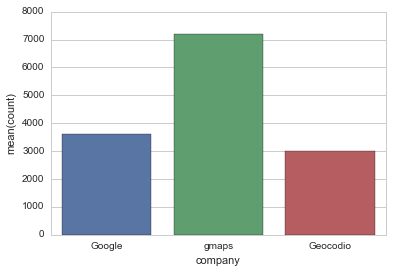

In [27]:
sns.set_style("whitegrid")
terms_data = [('Google',counter_google), ('gmaps',counter_gmaps), ('Geocodio', counter_geocodio)]
terms_labels = ['company', 'count']
# terms_data = [{'name':'company', 'terms': {counter_google, counter_geocodio}
terms_df = pd.DataFrame.from_records(terms_data, columns=terms_labels)
terms_df
ax = sns.barplot(x="company", y="count", data=terms_df)

# plt.bar(terms_df['count'],terms_df['company'], 4)



[3609, 7205, 3006]


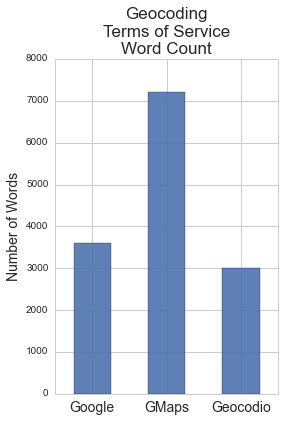

In [36]:
from pylab import rcParams
rcParams['figure.figsize'] = 4, 6
companies = ('Google','GMaps', 'Geocodio')
y_pos = [0,1,2]
word_counts = [counter_google, counter_gmaps, counter_geocodio] 
print word_counts
plt.bar(y_pos, 
        word_counts, 
        align='center', 
        alpha=.9, 
         width=.5)
plt.xticks(y_pos, companies, fontsize=14)
plt.ylabel('Number of Words',  fontsize=14)
plt.title('Geocoding\n\
Terms of Service\n\
Word Count',
          fontsize=17)
plt.show()

In [65]:
with open('google_terms.txt') as f:
    terms_text = f.read().replace('\n', '')
print'----  Google API Terms ----'
print textstat.flesch_reading_ease(terms_text)
print textstat.smog_index(terms_text) # smog
print textstat.flesch_kincaid_grade(terms_text) # grade
print textstat.coleman_liau_index(terms_text) # grade
print textstat.automated_readability_index(terms_text)
print textstat.dale_chall_readability_score(terms_text)
print textstat.difficult_words(terms_text)
print textstat.linsear_write_formula(terms_text)
print textstat.gunning_fog(terms_text)
print textstat.text_standard(terms_text)

with open('gmaps_terms.txt') as f:
    terms_text = f.read().replace('\n', '')
print'--- Google Maps API Terms -----'
google_ease_dict = {}
google_ease_dict['flesch_reading_ease'] = textstat.flesch_reading_ease(terms_text)
print textstat.smog_index(terms_text)
print textstat.flesch_kincaid_grade(terms_text)
print textstat.coleman_liau_index(terms_text)
print textstat.automated_readability_index(terms_text)
print textstat.dale_chall_readability_score(terms_text)
print textstat.difficult_words(terms_text)
print textstat.linsear_write_formula(terms_text)
print textstat.gunning_fog(terms_text)
print textstat.text_standard(terms_text)

with open('geocodio_terms.txt') as f:
    terms_text = f.read().replace('\n', '')
print'--- Geocodio API Terms -----'
print textstat.flesch_reading_ease(terms_text)
print textstat.smog_index(terms_text) # smog
print textstat.flesch_kincaid_grade(terms_text) # grade
print textstat.coleman_liau_index(terms_text) # grade
print textstat.automated_readability_index(terms_text)
print textstat.dale_chall_readability_score(terms_text)
print textstat.difficult_words(terms_text)
print textstat.linsear_write_formula(terms_text)
print textstat.gunning_fog(terms_text)
print textstat.text_standard(terms_text)

----  Google API Terms ----
39.67
11.2
13.4
13.7
15.3
8.43
808
13.0
11.2
13th and 14th grade
--- Google Maps API Terms -----
8.8
12.3
14.39
14.7
7.88
1438
10.5
10.0
14th and 15th grade
--- Geocodio API Terms -----
51.18
8.8
11.1
13.0
13.5
7.96
609
6.0
10.0
9th and 10th grade


In [63]:
def get_readability_scores(api, terms_file):
    with open(terms_file) as f:
        terms_text = f.read().replace('\n', '')
        readability_dict = {}
        readability_dict['filesource'] = terms_file
        readability_dict['API_terms'] = api
        readability_dict['smog_index'] = textstat.smog_index(terms_text)                                   # grade
        readability_dict['flesch_kincaid_grade'] = textstat.flesch_kincaid_grade(terms_text)               # grade
        readability_dict['coleman_liau_index'] = textstat.coleman_liau_index(terms_text)                   # grade
        readability_dict['automated_readability_index'] = textstat.automated_readability_index(terms_text) # grade
        readability_dict['dale_chall_readability_score'] = textstat.dale_chall_readability_score(terms_text)
        readability_dict['difficult_words'] = textstat.difficult_words(terms_text)
        readability_dict['linsear_write_formula'] = textstat.linsear_write_formula(terms_text)             # grade 
        readability_dict['gunning_fog'] = textstat.gunning_fog(terms_text)                                 # grade
        return readability_dict
    

In [64]:
google_dict = get_readability_scores('Google', 'google_terms.txt')
gmaps_dict = get_readability_scores('GMaps', 'gmaps_terms.txt')
# google_maps_dict = get_readability_scores('google maps', 'gmaps_terms.txt')
geocodio_dict = get_readability_scores('Geocodio', 'geocodio_terms.txt')
terms_readability = [google_dict, gmaps_dict, geocodio_dict]
rdbl_columns = ['API_terms','automated_readability_index','coleman_liau_index','dale_chall_readability_score', 'difficult_words','flesch_kincaid_grade','gunning_fog','linsear_write_formula', 'smog_index', 'filesource']
terms_df = pd.DataFrame(terms_readability, columns = rdbl_columns)
grade_score_cols =['automated_readability_index','coleman_liau_index','flesch_kincaid_grade','gunning_fog','linsear_write_formula','smog_index']
terms_grades_df = terms_df[grade_score_cols]
terms_grades_tx_df = terms_grades_df.T
terms_grades_tx_df
terms_df


,API_terms,automated_readability_index,coleman_liau_index,dale_chall_readability_score,difficult_words,flesch_kincaid_grade,gunning_fog,linsear_write_formula,smog_index,filesource
0,Google,15.3,13.70,8.43,808,13.4,11.2,13.0,11.2,google_terms.txt
1,GMaps,14.7,14.39,7.88,1438,12.3,10.0,10.5,8.8,gmaps_terms.txt
2,Geocodio,13.5,13.00,7.96,609,11.1,10.0,6.0,8.8,geocodio_terms.txt


In [58]:
google_grade= terms_grades_tx_df[0].mean().round(1)
google_maps_grade=terms_grades_tx_df[1].mean().round(1)
geocodio_grade = terms_grades_tx_df[2].mean().round(1)
google_hard_words = terms_df.loc[0,'difficult_words']
google_maps_hard_words = terms_df.loc[1, 'difficult_words']
geocodio_hard_words = terms_df.loc[2,'difficult_words']

print 'TOS            Readability Score       Difficult Words     Total Words'
print 'Google                ', google_grade, '               ', google_hard_words, '             ', counter_google
print 'Google Maps           ', google_maps_grade,'              ', google_maps_hard_words, '             ', counter_gmaps
print 'Geocodio              ', geocodio_grade,'               ',geocodio_hard_words, '             ', counter_geocodio

TOS            Readability Score       Difficult Words     Total Words
Google                 13.0                 808               3609
Google Maps            11.8                1438               7205
Geocodio               10.4                 609               3006
